# 뉴스기사 분류 - 다중분류

* 추가 실험
  * 더 크거나 작은 층을 사용 eg) 32개의 유닛, 128개의 유닛 등
  * 은닉층(hidden layer)를 2개 대신 1개 또는 3개를 사용

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [5]:
print(len(train_data))
print(len(test_data))
print(train_data[0])
print(train_labels[0]) # 0~45사이의 정수 = index

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [6]:
# 데이터를 벡터로 변환

import numpy as np

def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# 레이블을 벡터로 변환 - 여러개의 범주형 데이터에 사용되는 one-hot 인코딩

def to_one_hot(labels, dim=46):
  results = np.zeros((len(labels), dim))
  for i, l in enumerate(labels):
    results[i, l] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

* 32개의 유닛과 은닉층 1개

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 52ms/step - loss: 2.8647 - accuracy: 0.5477 - val_loss: 2.1914 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 1.8440 - accuracy: 0.6829 - val_loss: 1.6745 - val_accuracy: 0.6760
Epoch 3/20
16/16 [==============================] - 1s 36ms/step - loss: 1.4138 - accuracy: 0.7261 - val_loss: 1.3976 - val_accuracy: 0.7110
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 1.1501 - accuracy: 0.7680 - val_loss: 1.2349 - val_accuracy: 0.7360
Epoch 5/20
16/16 [==============================] - 1s 35ms/step - loss: 0.9710 - accuracy: 0.7995 - val_loss: 1.1244 - val_accuracy: 0.7630
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8351 - accuracy: 0.8259 - val_loss: 1.0512 - val_accuracy: 0.7800
Epoch 7/20
16/16 [==============================] - 1s 36ms/step - loss: 0.7272 - accuracy: 0.8483 - val_loss: 0.9983 - val_accuracy: 0.7900
Epoch 8/20
16

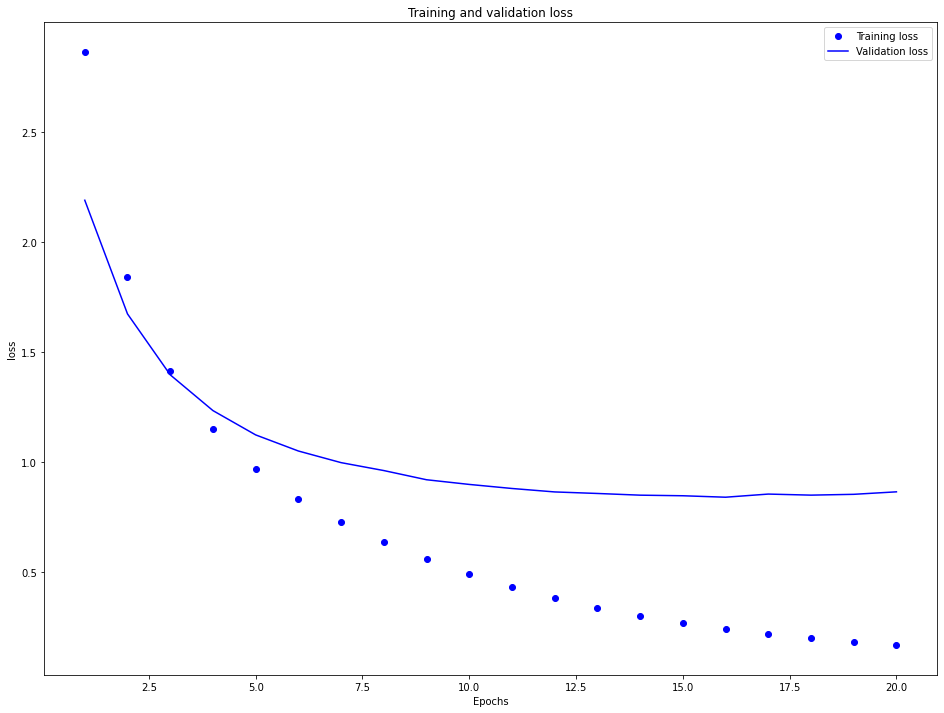

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

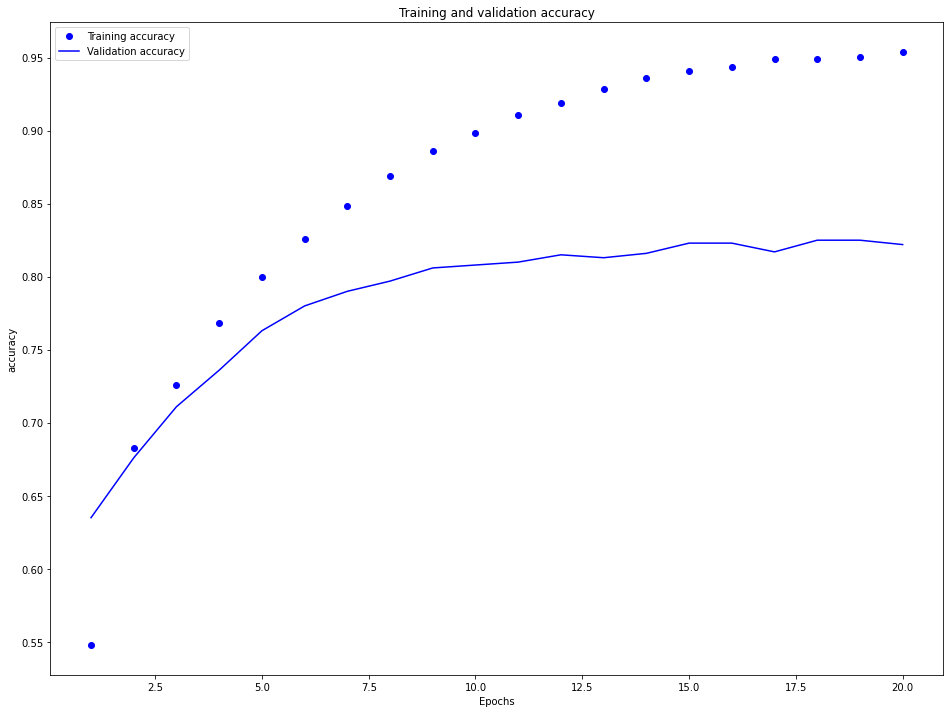

In [18]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [30]:
# 과대적합 찾고, 에포크를 새로 설정하여 다시 모델훈련

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=16, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/16
16/16 [==============================] - 1s 33ms/step - loss: 3.0275 - accuracy: 0.5277
Epoch 2/16
16/16 [==============================] - 1s 33ms/step - loss: 2.0470 - accuracy: 0.6759
Epoch 3/16
16/16 [==============================] - 1s 33ms/step - loss: 1.5297 - accuracy: 0.7250
Epoch 4/16
16/16 [==============================] - 1s 34ms/step - loss: 1.2125 - accuracy: 0.7642
Epoch 5/16
16/16 [==============================] - 1s 32ms/step - loss: 0.9972 - accuracy: 0.7990
Epoch 6/16
16/16 [==============================] - 1s 32ms/step - loss: 0.8419 - accuracy: 0.8332
Epoch 7/16
16/16 [==============================] - 1s 33ms/step - loss: 0.7226 - accuracy: 0.8578
Epoch 8/16
16/16 [==============================] - 1s 37ms/step - loss: 0.6278 - accuracy: 0.8800
Epoch 9/16
16/16 [==============================] - 1s 34ms/step - loss: 0.5480 - accuracy: 0.8935
Epoch 10/16
16/16 [==============================] - 1s 34ms/step - loss: 0.4820 - accuracy: 0.9062
Epoch 11/

In [31]:
# 새로운 데이터 예측

predictions = model.predict(x_test)
print(predictions[0].shape, np.argmax(predictions[0]))
np.sum(predictions[0])

(46,) 1.0 3


* 128개의 유닛과 은닉층 1개

In [32]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 84ms/step - loss: 2.2698 - accuracy: 0.5988 - val_loss: 1.4727 - val_accuracy: 0.7200
Epoch 2/20
16/16 [==============================] - 1s 72ms/step - loss: 1.1395 - accuracy: 0.7793 - val_loss: 1.1199 - val_accuracy: 0.7680
Epoch 3/20
16/16 [==============================] - 1s 73ms/step - loss: 0.7934 - accuracy: 0.8458 - val_loss: 0.9558 - val_accuracy: 0.8130
Epoch 4/20
16/16 [==============================] - 1s 73ms/step - loss: 0.5851 - accuracy: 0.8860 - val_loss: 0.8759 - val_accuracy: 0.8210
Epoch 5/20
16/16 [==============================] - 1s 74ms/step - loss: 0.4455 - accuracy: 0.9124 - val_loss: 0.8432 - val_accuracy: 0.8310
Epoch 6/20
16/16 [==============================] - 1s 75ms/step - loss: 0.3477 - accuracy: 0.9291 - val_loss: 0.8286 - val_accuracy: 0.8220
Epoch 7/20
16/16 [==============================] - 1s 72ms/step - loss: 0.2772 - accuracy: 0.9420 - val_loss: 0.8390 - val_accuracy: 0.8190
Epoch 8/20
16

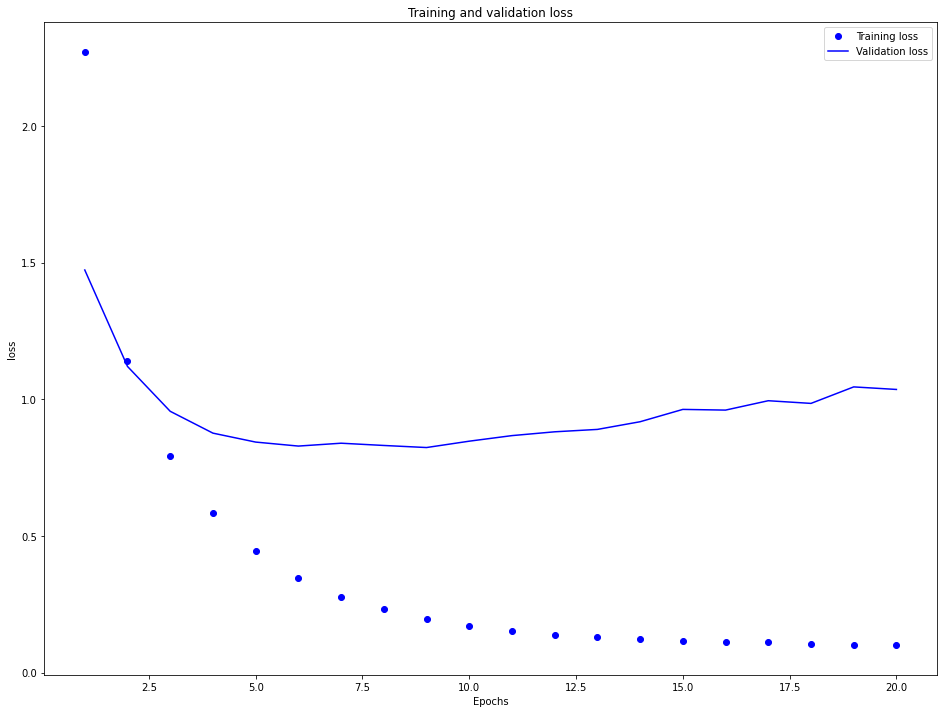

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

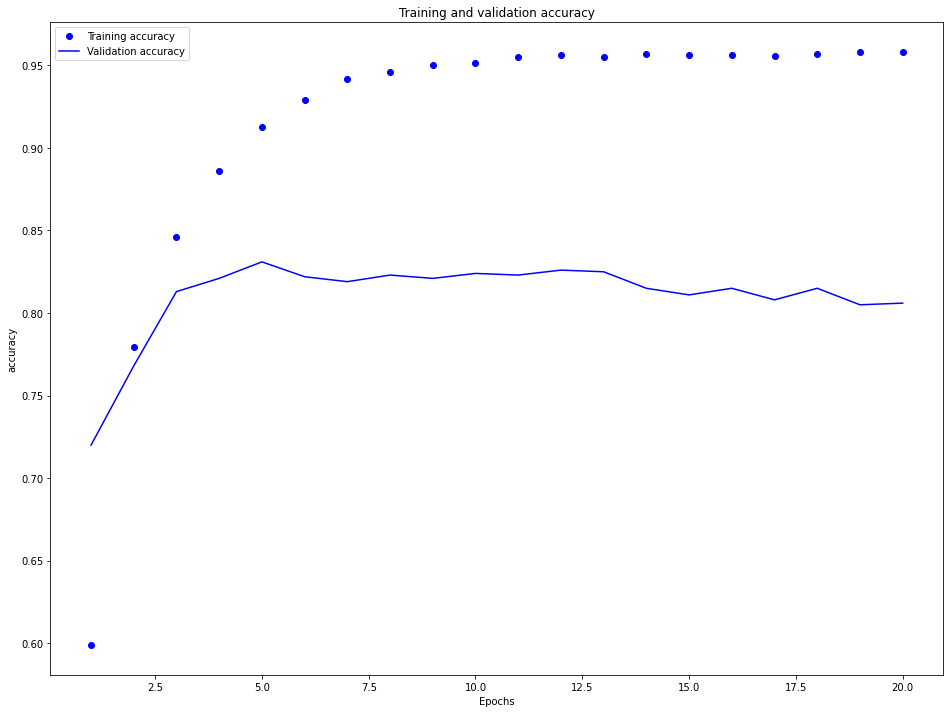

In [34]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [35]:
# 과대적합 찾고, 에포크를 새로 설정하여 다시 모델훈련

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/5
16/16 [==============================] - 1s 67ms/step - loss: 2.2503 - accuracy: 0.6015
Epoch 2/5
16/16 [==============================] - 1s 68ms/step - loss: 1.1290 - accuracy: 0.7774
Epoch 3/5
16/16 [==============================] - 1s 68ms/step - loss: 0.7774 - accuracy: 0.8464
Epoch 4/5
16/16 [==============================] - 1s 68ms/step - loss: 0.5707 - accuracy: 0.8908
Epoch 5/5
71/71 [==============================] - 0s 4ms/step - loss: 0.9136 - accuracy: 0.7952
[0.9135652780532837, 0.7951914668083191]


In [37]:
# 새로운 데이터 예측

predictions = model.predict(x_test)
print(predictions[0].shape, np.argmax(predictions[0]))
np.sum(predictions[0])

(46,) 3


1.0

* 32개의 유닛과 은닉층 3개

In [38]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 46ms/step - loss: 2.9726 - accuracy: 0.4927 - val_loss: 2.1367 - val_accuracy: 0.5710
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.7774 - accuracy: 0.6492 - val_loss: 1.5825 - val_accuracy: 0.6710
Epoch 3/20
16/16 [==============================] - 1s 35ms/step - loss: 1.3576 - accuracy: 0.7095 - val_loss: 1.3599 - val_accuracy: 0.7090
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 1.1223 - accuracy: 0.7539 - val_loss: 1.2386 - val_accuracy: 0.7220
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 0.9609 - accuracy: 0.7868 - val_loss: 1.1710 - val_accuracy: 0.7520
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8316 - accuracy: 0.8137 - val_loss: 1.1293 - val_accuracy: 0.7500
Epoch 7/20
16/16 [==============================] - 1s 36ms/step - loss: 0.7212 - accuracy: 0.8378 - val_loss: 1.0736 - val_accuracy: 0.7710
Epoch 8/20
16

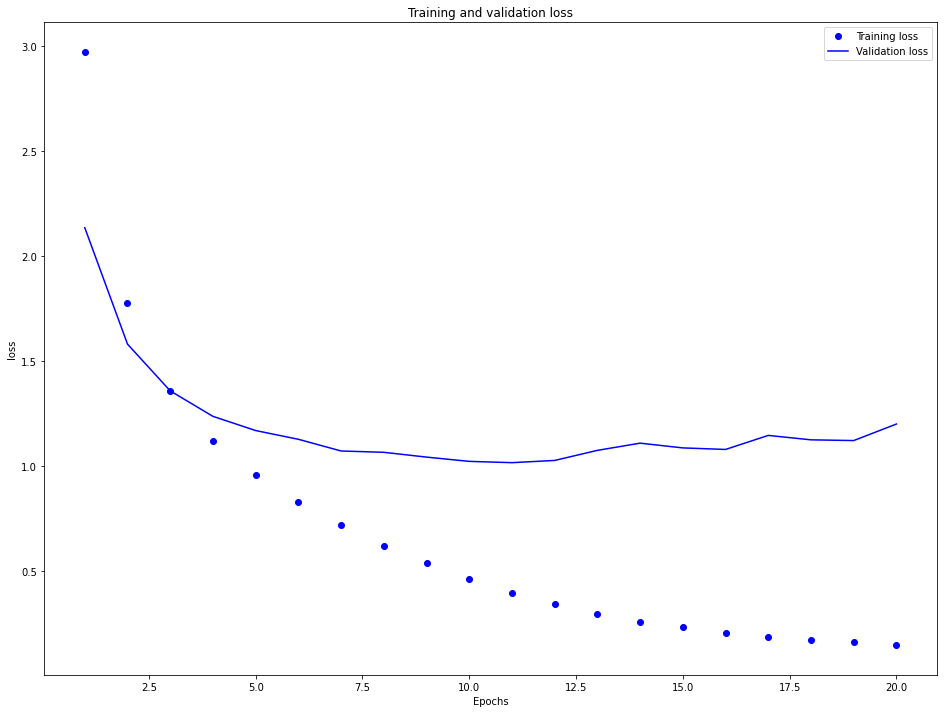

In [39]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

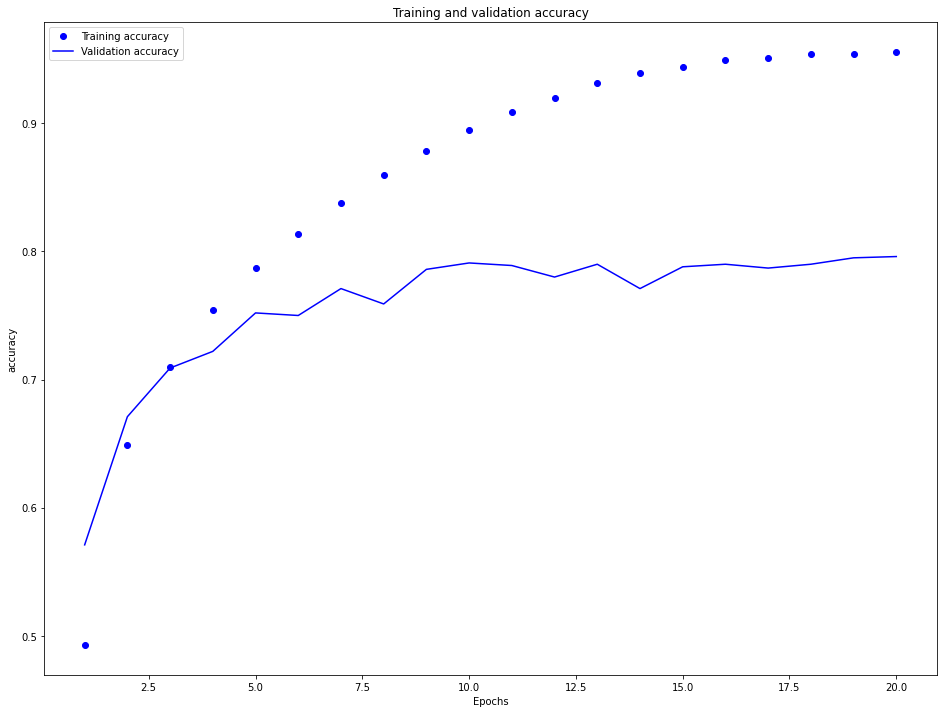

In [40]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [41]:
# 과대적합 찾고, 에포크를 새로 설정하여 다시 모델훈련

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=11, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/11
16/16 [==============================] - 1s 32ms/step - loss: 3.1115 - accuracy: 0.3361
Epoch 2/11
16/16 [==============================] - 1s 33ms/step - loss: 1.9160 - accuracy: 0.6031
Epoch 3/11
16/16 [==============================] - 1s 32ms/step - loss: 1.4783 - accuracy: 0.6902
Epoch 4/11
16/16 [==============================] - 1s 32ms/step - loss: 1.2457 - accuracy: 0.7293
Epoch 5/11
16/16 [==============================] - 1s 32ms/step - loss: 1.0750 - accuracy: 0.7553
Epoch 6/11
16/16 [==============================] - 1s 33ms/step - loss: 0.9352 - accuracy: 0.7808
Epoch 7/11
16/16 [==============================] - 1s 33ms/step - loss: 0.8173 - accuracy: 0.8063
Epoch 8/11
16/16 [==============================] - 1s 32ms/step - loss: 0.7117 - accuracy: 0.8331
Epoch 9/11
16/16 [==============================] - 1s 32ms/step - loss: 0.6202 - accuracy: 0.8597
Epoch 10/11
16/16 [==============================] - 1s 33ms/step - loss: 0.5402 - accuracy: 0.8806
Epoch 11/

In [42]:
# 새로운 데이터 예측

predictions = model.predict(x_test)
print(predictions[0].shape, np.sum(predictions[0]), np.argmax(predictions[0]))

(46,) 1.0000001 3


* 128개의 유닛과 은닉층 3개

In [43]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 89ms/step - loss: 2.1902 - accuracy: 0.5390 - val_loss: 1.5271 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 75ms/step - loss: 1.1973 - accuracy: 0.7304 - val_loss: 1.1320 - val_accuracy: 0.7620
Epoch 3/20
16/16 [==============================] - 1s 79ms/step - loss: 0.8391 - accuracy: 0.8130 - val_loss: 1.0183 - val_accuracy: 0.7940
Epoch 4/20
16/16 [==============================] - 1s 78ms/step - loss: 0.6127 - accuracy: 0.8638 - val_loss: 1.0146 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 76ms/step - loss: 0.4640 - accuracy: 0.8966 - val_loss: 0.9498 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 76ms/step - loss: 0.3252 - accuracy: 0.9268 - val_loss: 1.0001 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 1s 75ms/step - loss: 0.2867 - accuracy: 0.9345 - val_loss: 0.9447 - val_accuracy: 0.8200
Epoch 8/20
16

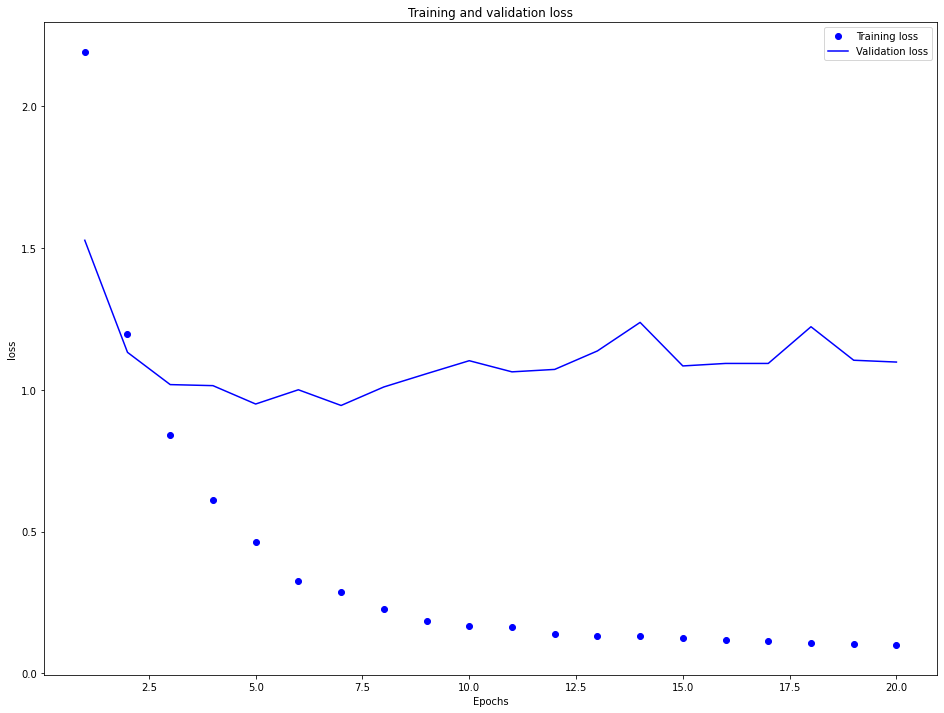

In [44]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

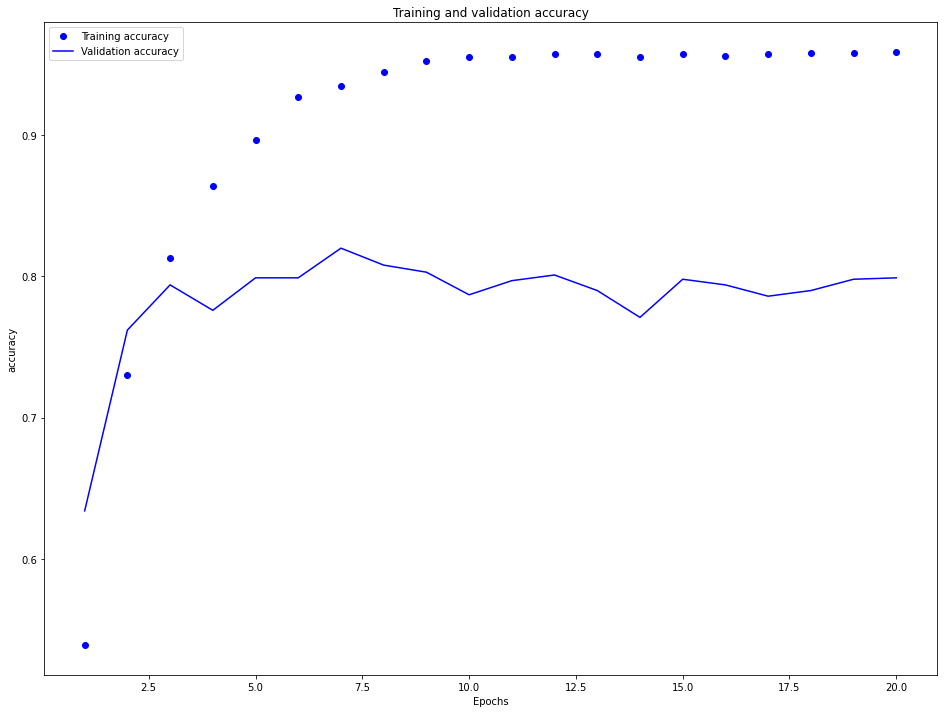

In [45]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [46]:
# 과대적합 찾고, 에포크를 새로 설정하여 다시 모델훈련

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/5
16/16 [==============================] - 2s 71ms/step - loss: 2.3268 - accuracy: 0.5274
Epoch 2/5
16/16 [==============================] - 1s 72ms/step - loss: 1.2014 - accuracy: 0.7283
Epoch 3/5
16/16 [==============================] - 1s 80ms/step - loss: 0.8745 - accuracy: 0.8067
Epoch 4/5
16/16 [==============================] - 1s 85ms/step - loss: 0.6435 - accuracy: 0.8603
Epoch 5/5
71/71 [==============================] - 1s 6ms/step - loss: 1.0061 - accuracy: 0.7818
[1.006089687347412, 0.7818343639373779]


In [47]:
# 새로운 데이터 예측

predictions = model.predict(x_test)
print(predictions[0].shape, np.sum(predictions[0]), np.argmax(predictions[0]))

(46,) 0.99999994 3


* 은닉층 2개, 중간 은닉층 unit 32

In [48]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 2.9093 - accuracy: 0.4921 - val_loss: 2.1133 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.6861 - accuracy: 0.6778 - val_loss: 1.4919 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.1851 - accuracy: 0.7482 - val_loss: 1.2278 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.9248 - accuracy: 0.8004 - val_loss: 1.1306 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.7540 - accuracy: 0.8408 - val_loss: 1.0386 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6239 - accuracy: 0.8723 - val_loss: 0.9888 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5197 - accuracy: 0.8930 - val_loss: 0.9488 - val_accuracy: 0.8030
Epoch 8/20
16

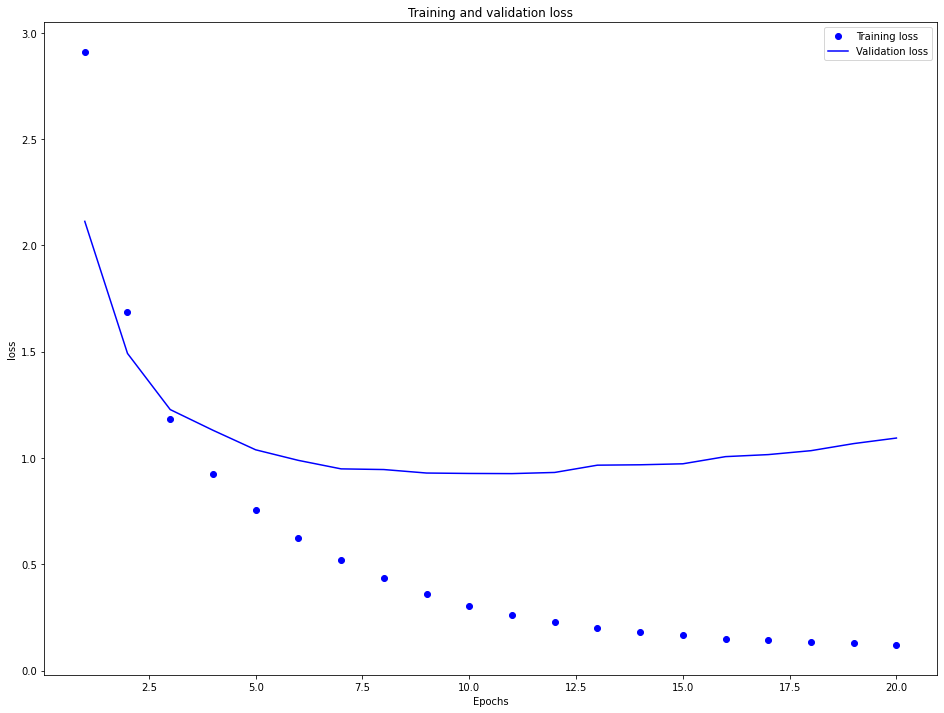

In [49]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

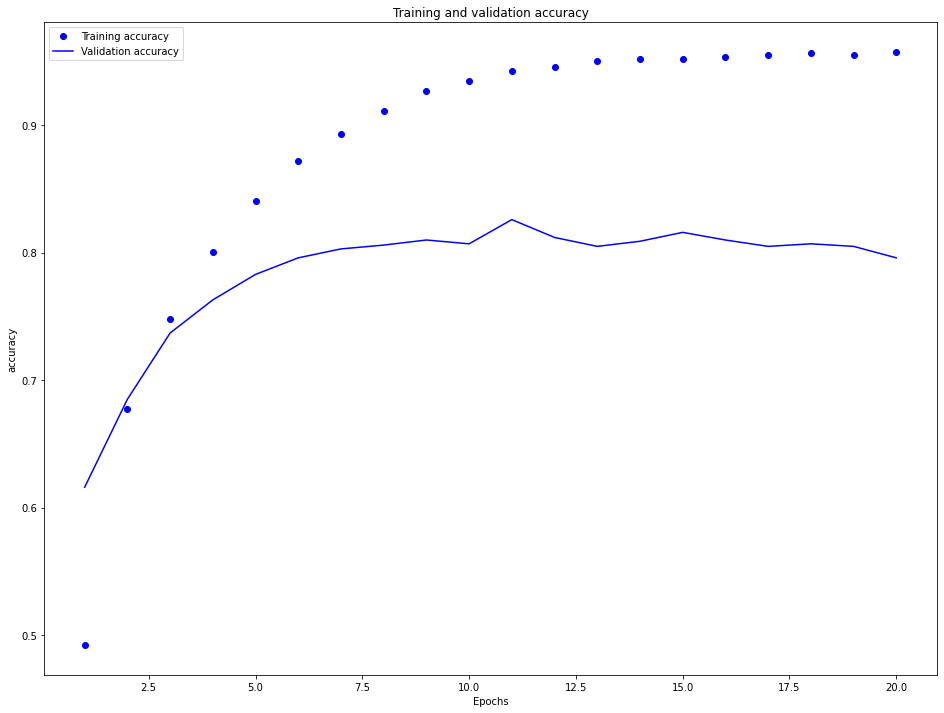

In [50]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [51]:
# 과대적합 찾고, 에포크를 새로 설정하여 다시 모델훈련

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=11, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/11
16/16 [==============================] - 1s 47ms/step - loss: 2.6025 - accuracy: 0.5353
Epoch 2/11
16/16 [==============================] - 1s 48ms/step - loss: 1.5235 - accuracy: 0.6917
Epoch 3/11
16/16 [==============================] - 1s 48ms/step - loss: 1.1437 - accuracy: 0.7538
Epoch 4/11
16/16 [==============================] - 1s 46ms/step - loss: 0.9227 - accuracy: 0.7979
Epoch 5/11
16/16 [==============================] - 1s 47ms/step - loss: 0.7607 - accuracy: 0.8345
Epoch 6/11
16/16 [==============================] - 1s 47ms/step - loss: 0.6295 - accuracy: 0.8667
Epoch 7/11
16/16 [==============================] - 1s 50ms/step - loss: 0.5230 - accuracy: 0.8905
Epoch 8/11
16/16 [==============================] - 1s 47ms/step - loss: 0.4339 - accuracy: 0.9100
Epoch 9/11
16/16 [==============================] - 1s 48ms/step - loss: 0.3656 - accuracy: 0.9227
Epoch 10/11
16/16 [==============================] - 1s 49ms/step - loss: 0.3076 - accuracy: 0.9364
Epoch 11/

* 은닉층 2개, 은닉층 unit 32

In [53]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 3.0450 - accuracy: 0.4533 - val_loss: 2.4025 - val_accuracy: 0.5940
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 2.0274 - accuracy: 0.6267 - val_loss: 1.7880 - val_accuracy: 0.6310
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.5139 - accuracy: 0.7016 - val_loss: 1.4462 - val_accuracy: 0.6840
Epoch 4/20
16/16 [==============================] - 1s 37ms/step - loss: 1.2054 - accuracy: 0.7504 - val_loss: 1.2611 - val_accuracy: 0.7340
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 1.0045 - accuracy: 0.7913 - val_loss: 1.1525 - val_accuracy: 0.7450
Epoch 6/20
16/16 [==============================] - 1s 37ms/step - loss: 0.8577 - accuracy: 0.8193 - val_loss: 1.0718 - val_accuracy: 0.7810
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.7375 - accuracy: 0.8463 - val_loss: 1.0281 - val_accuracy: 0.7820
Epoch 8/20
16

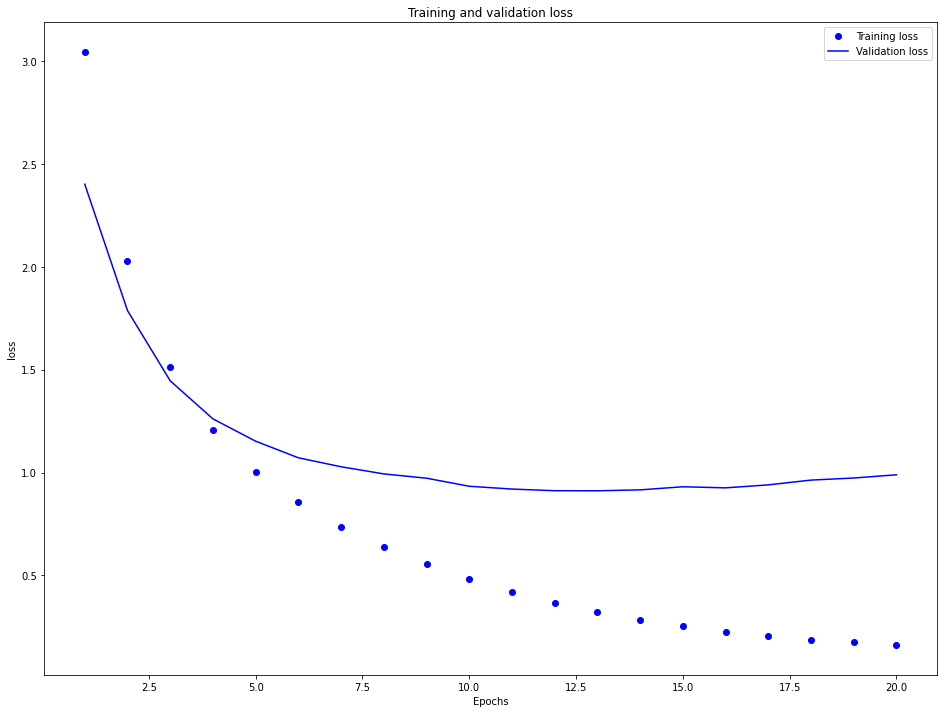

In [54]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

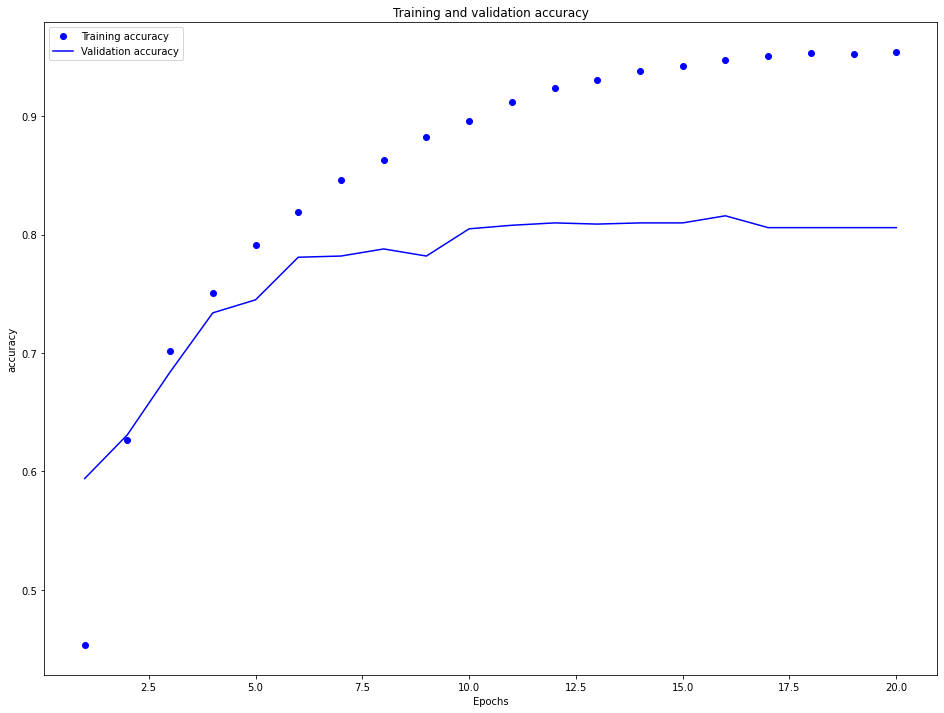

In [55]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [56]:
# 과대적합 찾고, 에포크를 새로 설정하여 다시 모델훈련

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=13, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/13
16/16 [==============================] - 1s 36ms/step - loss: 3.1714 - accuracy: 0.5142
Epoch 2/13
16/16 [==============================] - 1s 35ms/step - loss: 1.9781 - accuracy: 0.6407
Epoch 3/13
16/16 [==============================] - 1s 35ms/step - loss: 1.4372 - accuracy: 0.7095
Epoch 4/13
16/16 [==============================] - 1s 34ms/step - loss: 1.1604 - accuracy: 0.7638
Epoch 5/13
16/16 [==============================] - 1s 35ms/step - loss: 0.9801 - accuracy: 0.7932
Epoch 6/13
16/16 [==============================] - 1s 33ms/step - loss: 0.8451 - accuracy: 0.8202
Epoch 7/13
16/16 [==============================] - 1s 35ms/step - loss: 0.7310 - accuracy: 0.8450
Epoch 8/13
16/16 [==============================] - 1s 34ms/step - loss: 0.6334 - accuracy: 0.8618
Epoch 9/13
16/16 [==============================] - 1s 36ms/step - loss: 0.5471 - accuracy: 0.8815
Epoch 10/13
16/16 [==============================] - 1s 34ms/step - loss: 0.4753 - accuracy: 0.9007
Epoch 11/

* 은닉층 2개, 중간 은닉층 unit 128

In [57]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 2.4552 - accuracy: 0.5336 - val_loss: 1.5809 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.3246 - accuracy: 0.7120 - val_loss: 1.2632 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 0.9939 - accuracy: 0.7841 - val_loss: 1.1176 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.7669 - accuracy: 0.8366 - val_loss: 0.9839 - val_accuracy: 0.7960
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6026 - accuracy: 0.8715 - val_loss: 0.9628 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4791 - accuracy: 0.8975 - val_loss: 0.9066 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.3732 - accuracy: 0.9227 - val_loss: 0.8830 - val_accuracy: 0.8110
Epoch 8/20
16

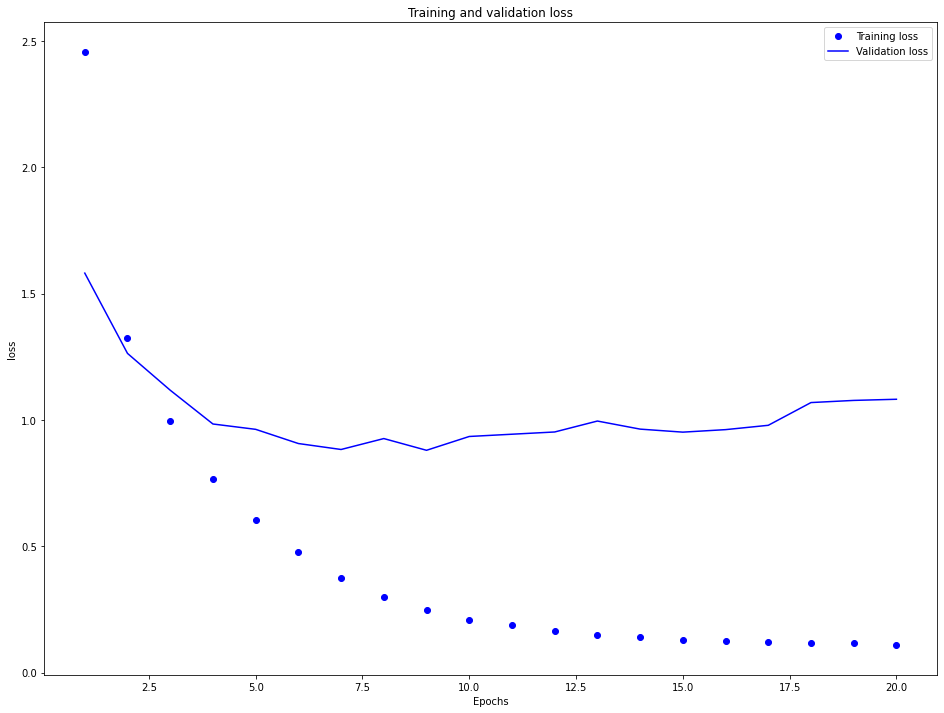

In [58]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

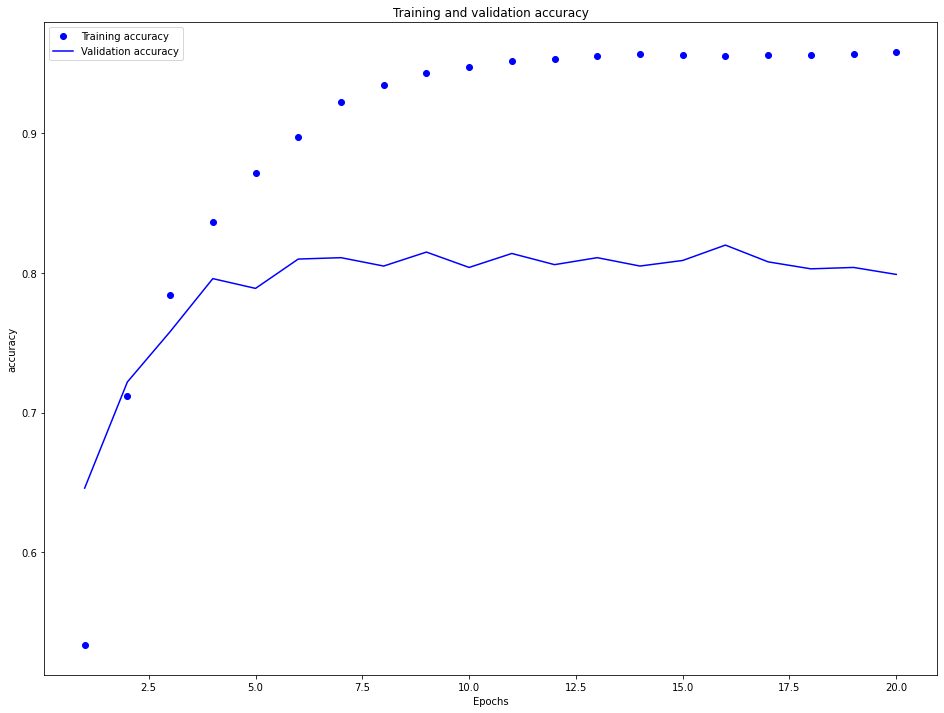

In [59]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [60]:
# 과대적합 찾고, 에포크를 새로 설정하여 다시 모델훈련

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/7
16/16 [==============================] - 1s 50ms/step - loss: 2.3765 - accuracy: 0.4966
Epoch 2/7
16/16 [==============================] - 1s 50ms/step - loss: 1.3302 - accuracy: 0.7023
Epoch 3/7
16/16 [==============================] - 1s 50ms/step - loss: 1.0087 - accuracy: 0.7730
Epoch 4/7
16/16 [==============================] - 1s 50ms/step - loss: 0.8061 - accuracy: 0.8202
Epoch 5/7
16/16 [==============================] - 1s 47ms/step - loss: 0.6000 - accuracy: 0.8641
Epoch 6/7
16/16 [==============================] - 1s 49ms/step - loss: 0.4722 - accuracy: 0.8956
Epoch 7/7
71/71 [==============================] - 0s 3ms/step - loss: 1.1441 - accuracy: 0.7618
[1.1441320180892944, 0.7617987394332886]


* 은닉층 2개, 은닉층 unit 128개

In [61]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 91ms/step - loss: 2.1395 - accuracy: 0.5519 - val_loss: 1.3657 - val_accuracy: 0.6840
Epoch 2/20
16/16 [==============================] - 1s 78ms/step - loss: 1.1092 - accuracy: 0.7542 - val_loss: 1.1562 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 1s 79ms/step - loss: 0.7756 - accuracy: 0.8314 - val_loss: 0.9942 - val_accuracy: 0.7900
Epoch 4/20
16/16 [==============================] - 1s 79ms/step - loss: 0.5716 - accuracy: 0.8796 - val_loss: 0.9390 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 78ms/step - loss: 0.4113 - accuracy: 0.9136 - val_loss: 0.8796 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 80ms/step - loss: 0.3099 - accuracy: 0.9330 - val_loss: 0.8797 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 79ms/step - loss: 0.2422 - accuracy: 0.9444 - val_loss: 0.9426 - val_accuracy: 0.7900
Epoch 8/20
16

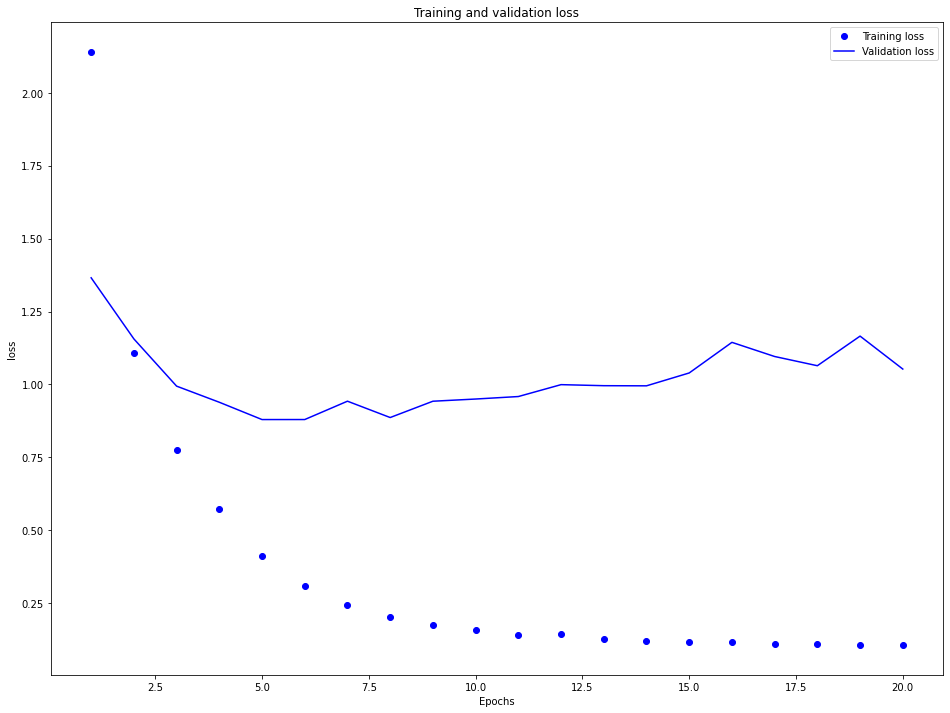

In [62]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

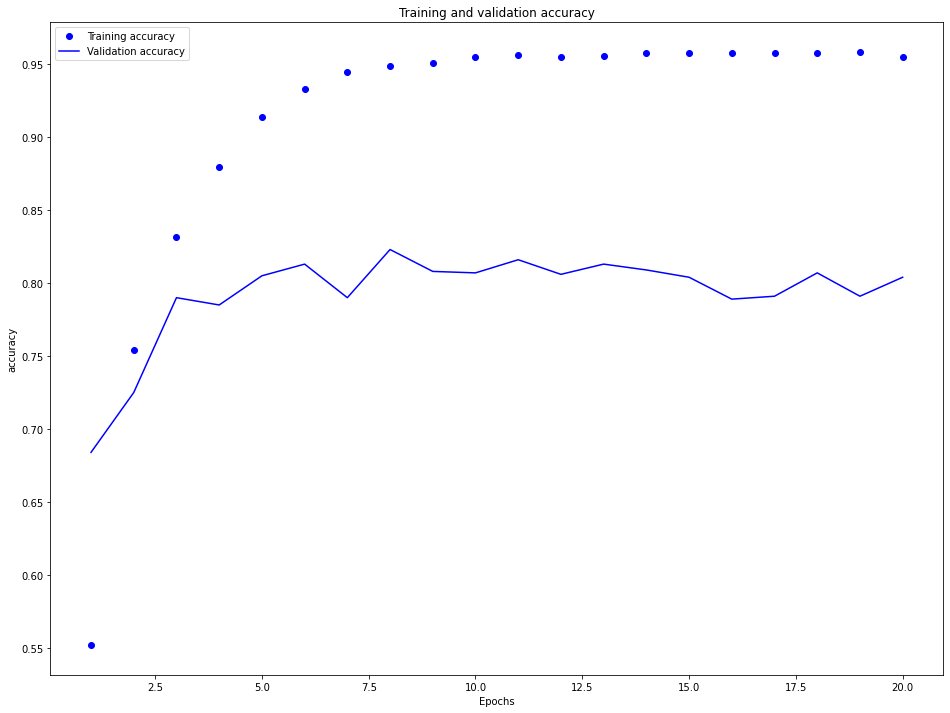

In [63]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [64]:
# 과대적합 찾고, 에포크를 새로 설정하여 다시 모델훈련

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/6
16/16 [==============================] - 2s 72ms/step - loss: 2.1490 - accuracy: 0.5274
Epoch 2/6
16/16 [==============================] - 1s 74ms/step - loss: 1.1856 - accuracy: 0.7344
Epoch 3/6
16/16 [==============================] - 1s 73ms/step - loss: 0.8377 - accuracy: 0.8136
Epoch 4/6
16/16 [==============================] - 1s 72ms/step - loss: 0.6365 - accuracy: 0.8514
Epoch 5/6
16/16 [==============================] - 1s 74ms/step - loss: 0.4669 - accuracy: 0.8950
Epoch 6/6
71/71 [==============================] - 0s 4ms/step - loss: 1.0110 - accuracy: 0.7898
[1.0110042095184326, 0.7898486256599426]
